In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gym-members-exercise-dataset/gym_members_exercise_tracking.csv


# This model will help to calculate BMI using this input features

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/kaggle/input/gym-members-exercise-dataset/gym_members_exercise_tracking.csv')

In [4]:
df.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [5]:
df.shape

(973, 15)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

In [7]:
df.describe()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
count,973.000000,973.000000,973.00000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000
mean,38.683453,73.854676,1.72258,179.883864,143.766701,62.223022,1.256423,905.422405,24.976773,2.626619,3.321686,1.809866,24.912127
std,12.180928,21.207500,0.12772,11.525686,14.345101,7.327060,0.343033,272.641516,6.259419,0.600172,0.913047,0.739693,6.660879
min,18.000000,40.000000,1.50000,160.000000,120.000000,50.000000,0.500000,303.000000,10.000000,1.500000,2.000000,1.000000,12.320000
25%,28.000000,58.100000,1.62000,170.000000,131.000000,56.000000,1.040000,720.000000,21.300000,2.200000,3.000000,1.000000,20.110000
50%,40.000000,70.000000,1.71000,180.000000,143.000000,62.000000,1.260000,893.000000,26.200000,2.600000,3.000000,2.000000,24.160000
75%,49.000000,86.000000,1.80000,190.000000,156.000000,68.000000,1.460000,1076.000000,29.300000,3.100000,4.000000,2.000000,28.560000
max,59.000000,129.900000,2.00000,199.000000,169.000000,74.000000,2.000000,1783.000000,35.000000,3.700000,5.000000,3.000000,49.840000


In [8]:
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']
numerical_features = [feature for feature in df.columns if feature not in categorical_features]

In [9]:
numerical_features

['Age',
 'Weight (kg)',
 'Height (m)',
 'Max_BPM',
 'Avg_BPM',
 'Resting_BPM',
 'Session_Duration (hours)',
 'Calories_Burned',
 'Fat_Percentage',
 'Water_Intake (liters)',
 'Workout_Frequency (days/week)',
 'Experience_Level',
 'BMI']

In [10]:
categorical_features

['Gender', 'Workout_Type']

In [11]:
## value counts of categorical features
for col in categorical_features:
    counts = df[col].value_counts()
    print(f"\n============{col}================")
    print(counts)


============Gender================
Gender
Male      511
Female    462
Name: count, dtype: int64

============Workout_Type================
Workout_Type
Strength    258
Cardio      255
Yoga        239
HIIT        221
Name: count, dtype: int64


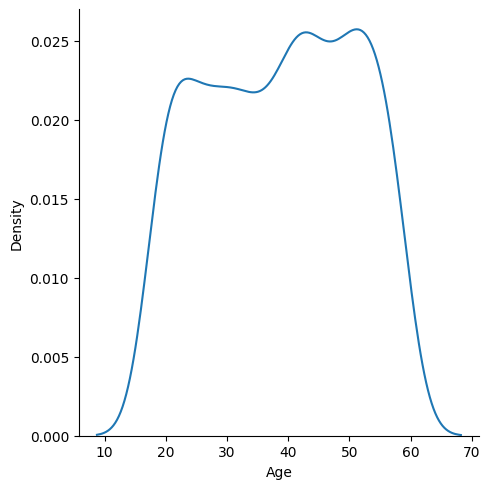

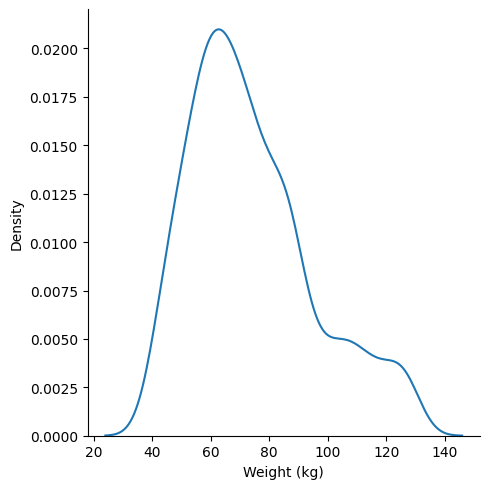

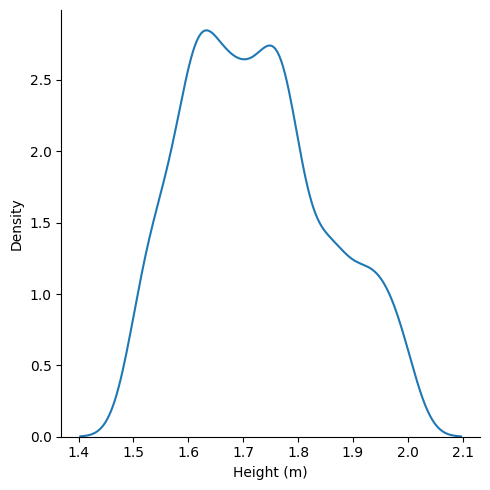

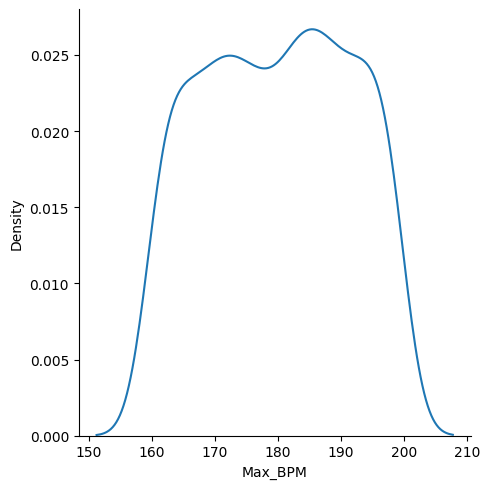

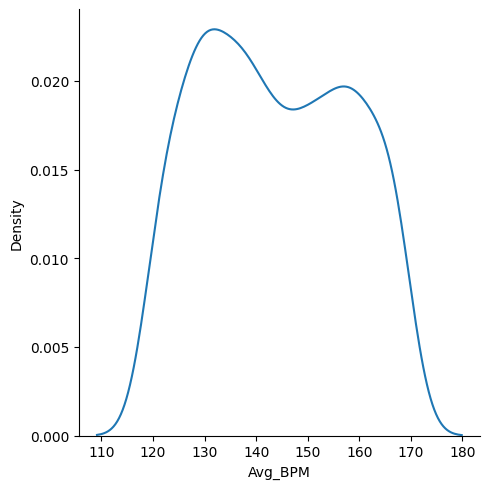

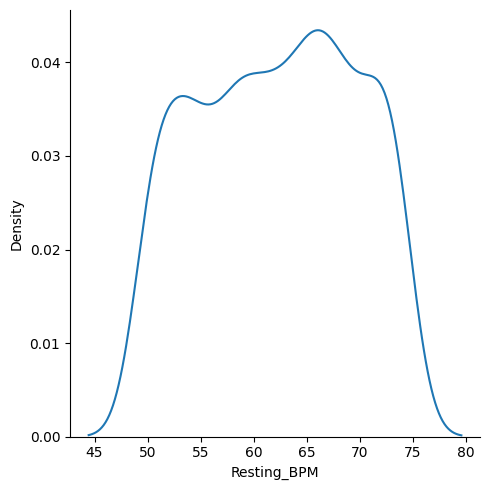

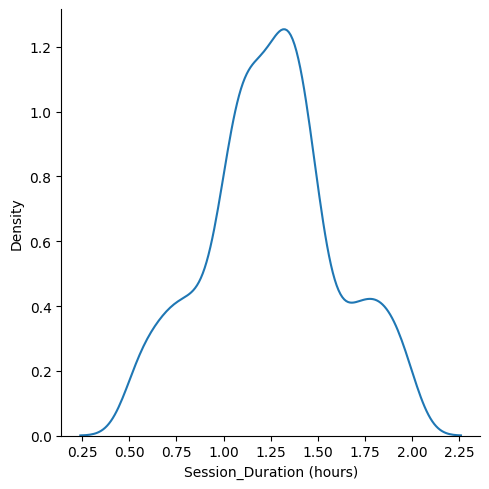

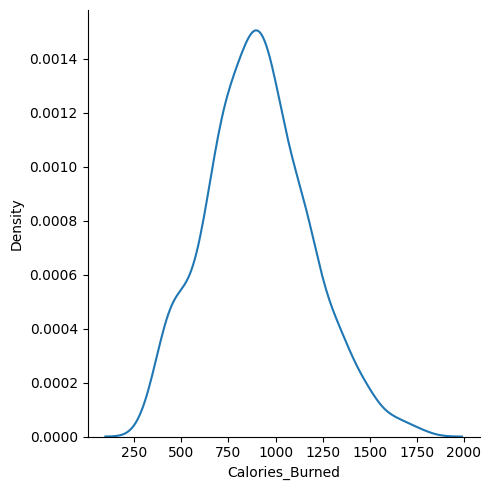

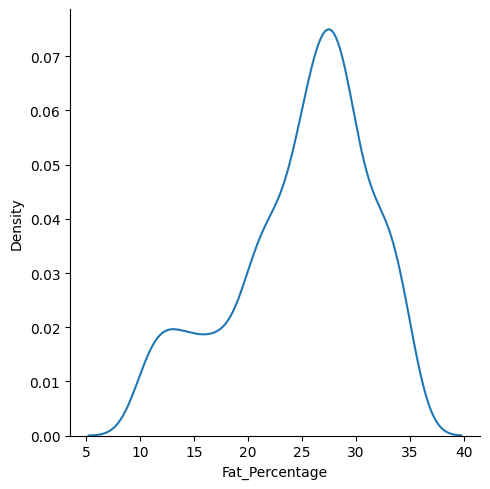

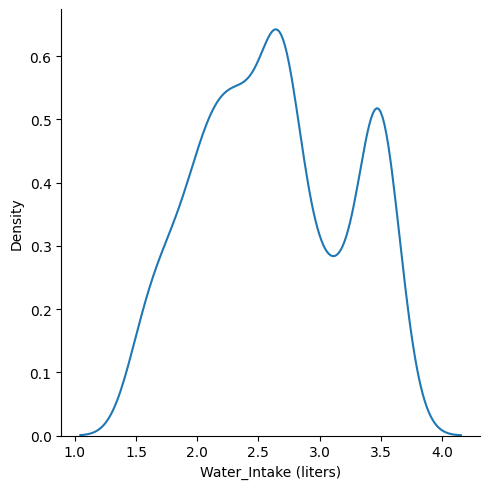

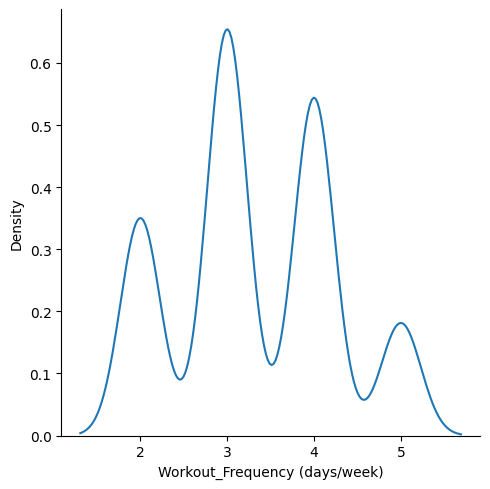

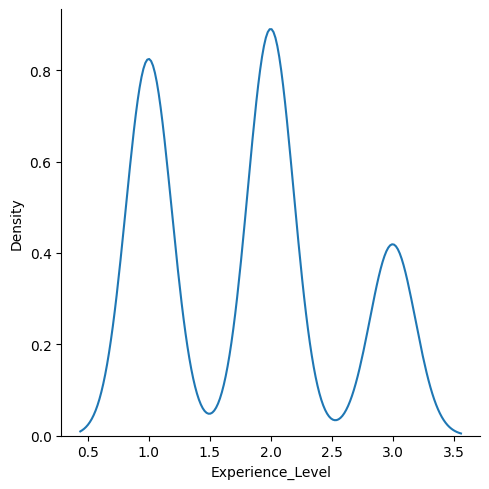

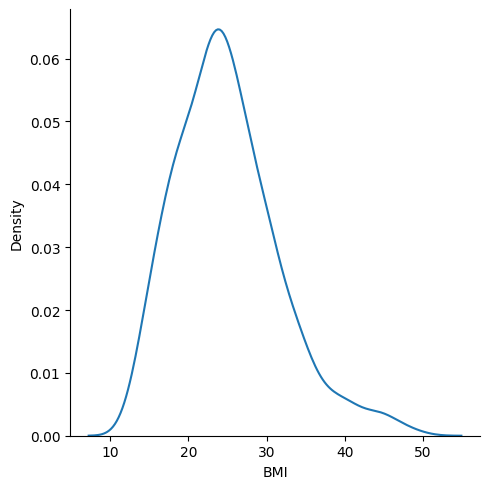

In [12]:
## kde plot
for col in numerical_features:
    sns.displot(df[col], kind='kde')

plt.show()

In [13]:
df.columns

Index(['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM',
       'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned',
       'Workout_Type', 'Fat_Percentage', 'Water_Intake (liters)',
       'Workout_Frequency (days/week)', 'Experience_Level', 'BMI'],
      dtype='object')

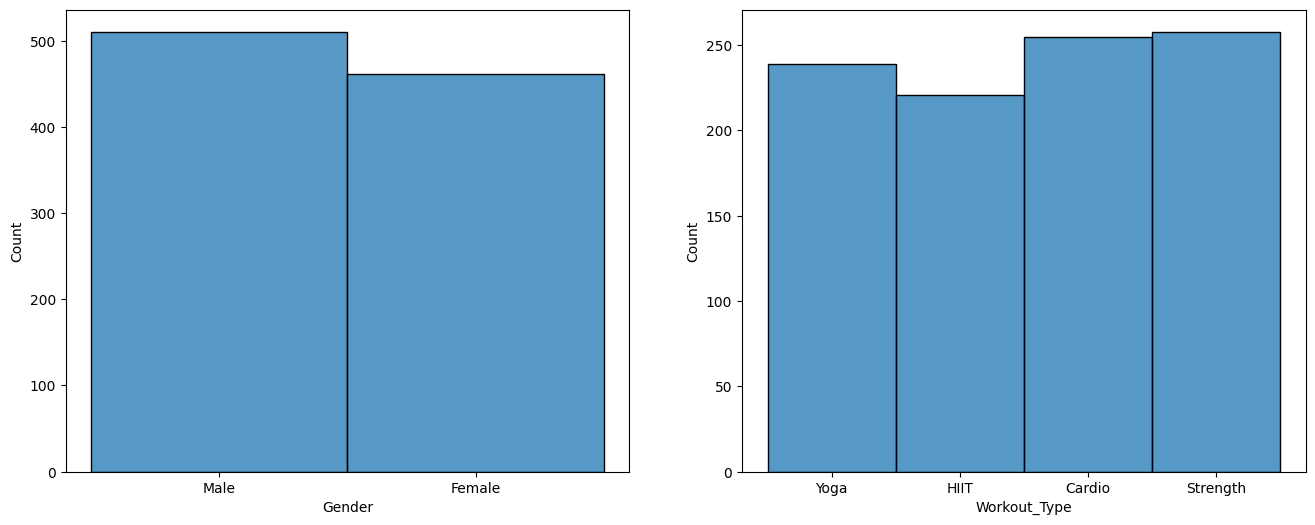

In [14]:
plt.subplots(ncols=2, figsize=(16, 6))
for index, col in enumerate(categorical_features):
    plt.subplot(1,2,index+1)
    sns.histplot(df[col])

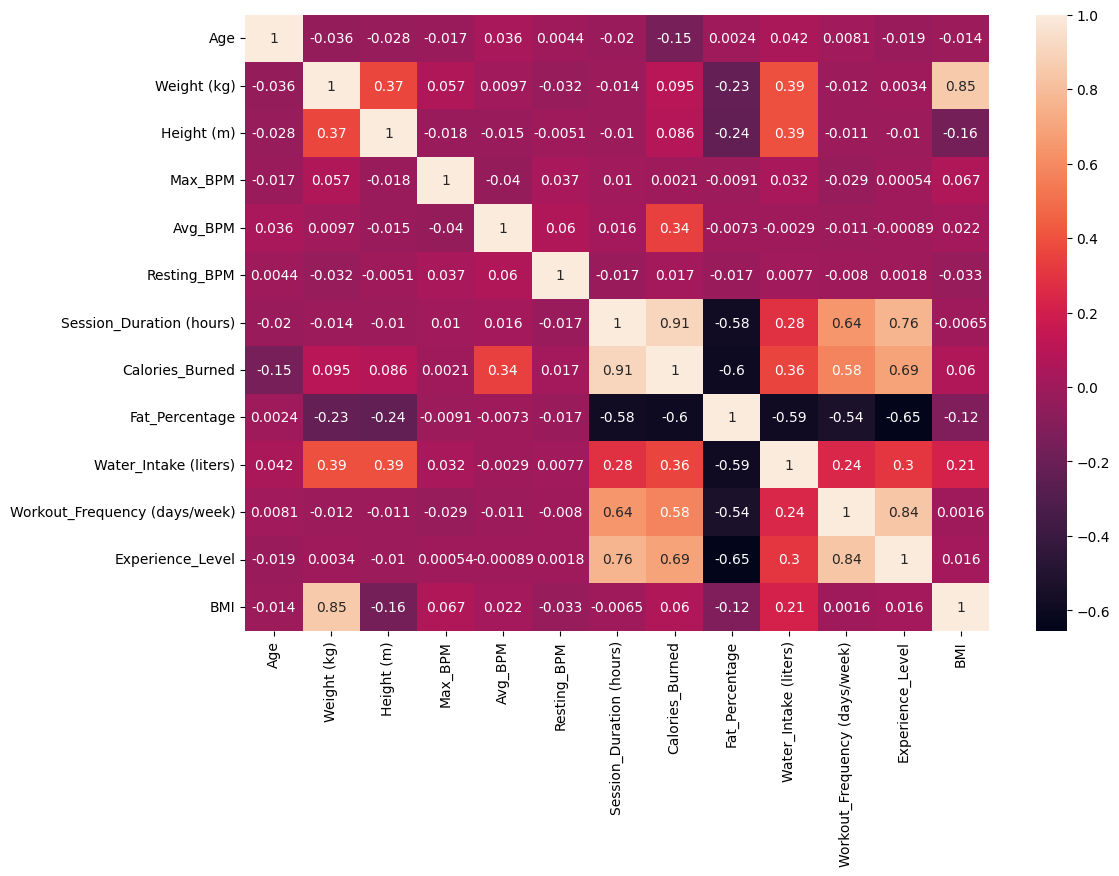

In [15]:
## heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df[numerical_features].corr(), annot=True)
plt.show()

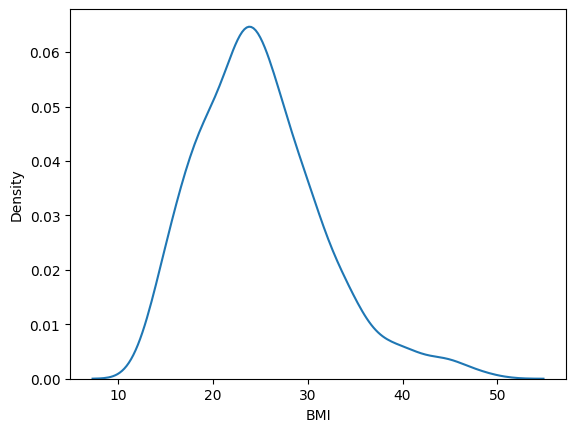

In [16]:
## kde plot of MBI and calori burn featurees
sns.kdeplot(df['BMI'])
plt.show()

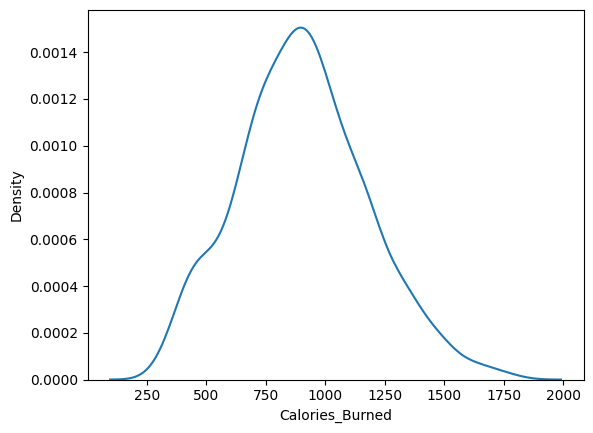

In [17]:
sns.kdeplot(df['Calories_Burned'])
plt.show()

<Axes: >

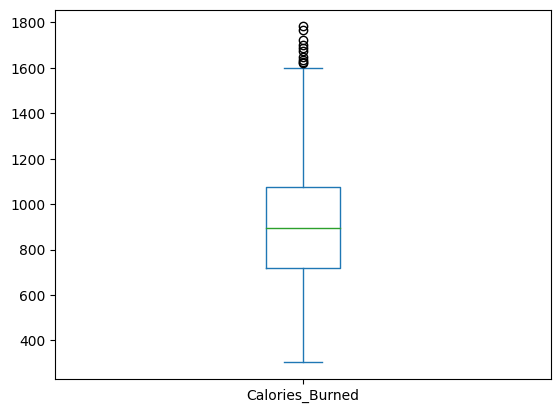

In [18]:
df['Calories_Burned'].plot(kind='box')

<Axes: >

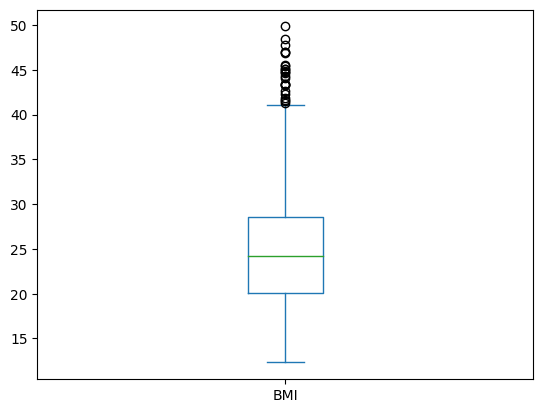

In [19]:
df['BMI'].plot(kind='box')

In [20]:
# plt.subplots(ncols=4, nrows=3,figsize=(16, 6))
# for index, col in enumerate(numerical_features):
#     plt.subplot(1,2,index+1)
#     sns.boxplot(df[col])

In [21]:
# sns.pairplot(df[numerical_features])

## Remove outliers

In [22]:
np.array

<function numpy.array>

In [23]:
## outlier detector function
def outlier_detector(arr):
    ## arr is a array
    q1 = arr.quantile(0.25)
    q3 = arr.quantile(0.75)
    iqr = q3-q1
    lower = q1-(1.5*iqr)
    upper = q3+(1.5*iqr)
    return upper, lower

In [24]:
outlier_detector??

In [25]:
for col in numerical_features:
    upper, lower = outlier_detector(df[col])
    print(f"=========={col}============")
    print(f"upper value: {upper:.2f} & lower values: {lower:.2f}\n")

==========Age============
upper value: 80.50 & lower values: -3.50

==========Weight (kg)============
upper value: 127.85 & lower values: 16.25

==========Height (m)============
upper value: 2.07 & lower values: 1.35

==========Max_BPM============
upper value: 220.00 & lower values: 140.00

==========Avg_BPM============
upper value: 193.50 & lower values: 93.50

==========Resting_BPM============
upper value: 86.00 & lower values: 38.00

==========Session_Duration (hours)============
upper value: 2.09 & lower values: 0.41

==========Calories_Burned============
upper value: 1610.00 & lower values: 186.00

==========Fat_Percentage============
upper value: 41.30 & lower values: 9.30

==========Water_Intake (liters)============
upper value: 4.45 & lower values: 0.85

==========Workout_Frequency (days/week)============
upper value: 5.50 & lower values: 1.50

==========Experience_Level============
upper value: 3.50 & lower values: -0.50

==========BMI============
upper value: 41.23 & lower va

In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_numerical_features = scaler.fit_transform(df[numerical_features])

numerical_df = pd.DataFrame(scaled_numerical_features, columns=df[numerical_features].columns)

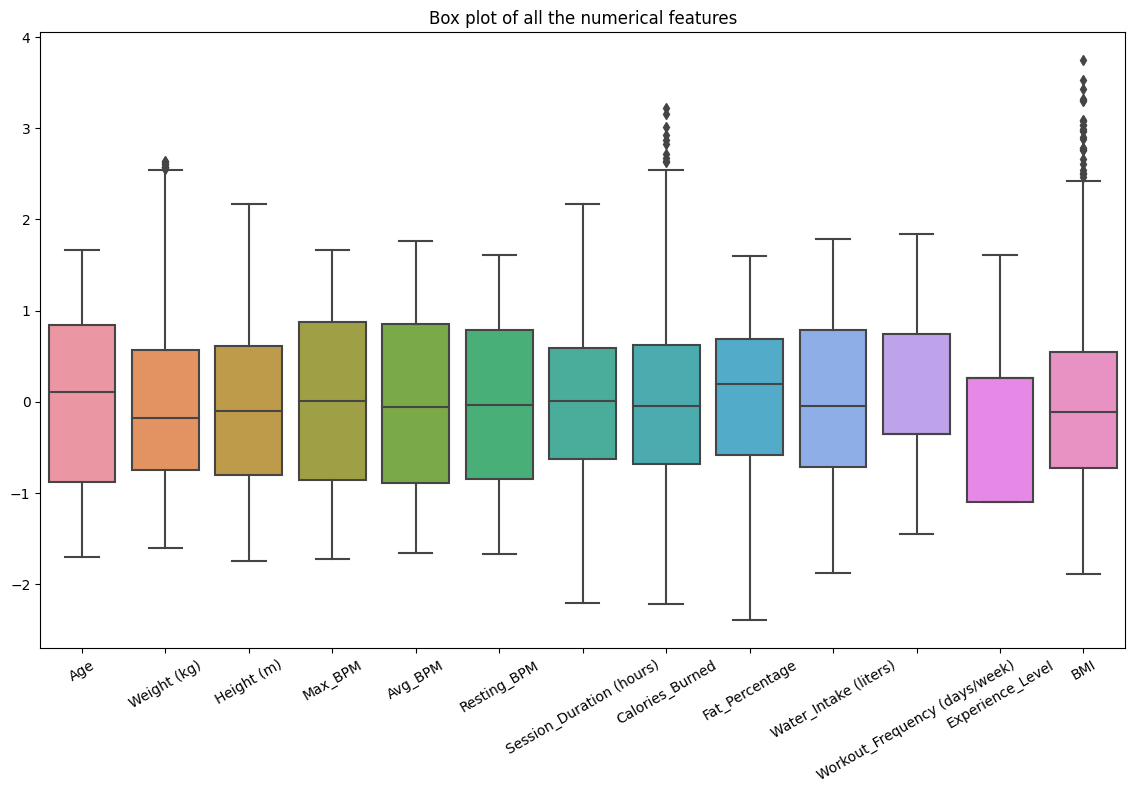

In [27]:
plt.figure(figsize=(14, 8))
plt.xticks(rotation=30)
sns.boxplot(numerical_df)
plt.title("Box plot of all the numerical features")
plt.show()

In [28]:
weight_upper, weight_lower = outlier_detector(df['Weight (kg)'])
cb_upper, cb_lower = outlier_detector(df['Calories_Burned'])
bmi_upper, bmi_lower = outlier_detector(df['BMI'])

In [29]:
df1 = df[(df['Weight (kg)'] > weight_lower) & (df['Weight (kg)'] < weight_upper)]
df2 = df1[(df1['Calories_Burned'] > cb_lower) & (df1['Calories_Burned'] < cb_upper)]
df3 = df2[(df2['BMI'] > bmi_lower) & (df2['BMI'] < bmi_upper)]

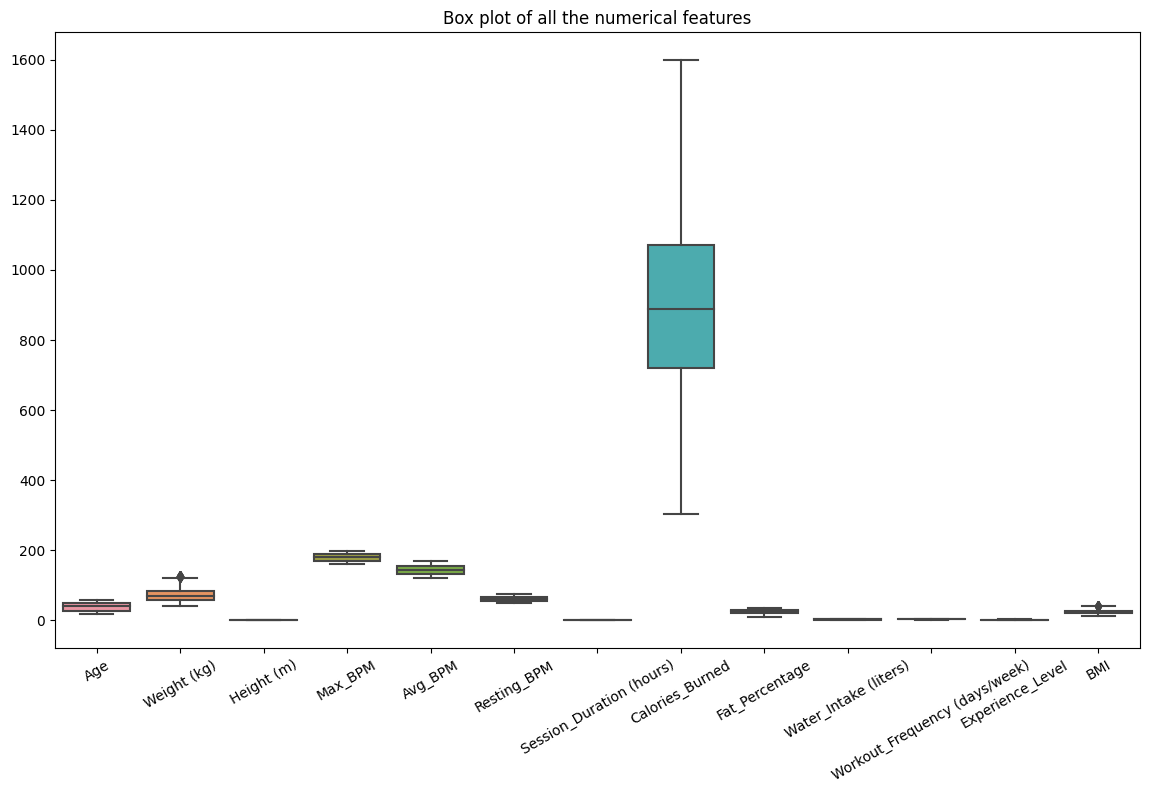

In [30]:
plt.figure(figsize=(14, 8))
plt.xticks(rotation=30)
sns.boxplot(df3[numerical_features])
plt.title("Box plot of all the numerical features")
plt.show()

In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_numerical_features = scaler.fit_transform(df3[numerical_features])

numerical_df = pd.DataFrame(scaled_numerical_features, columns=df3[numerical_features].columns)

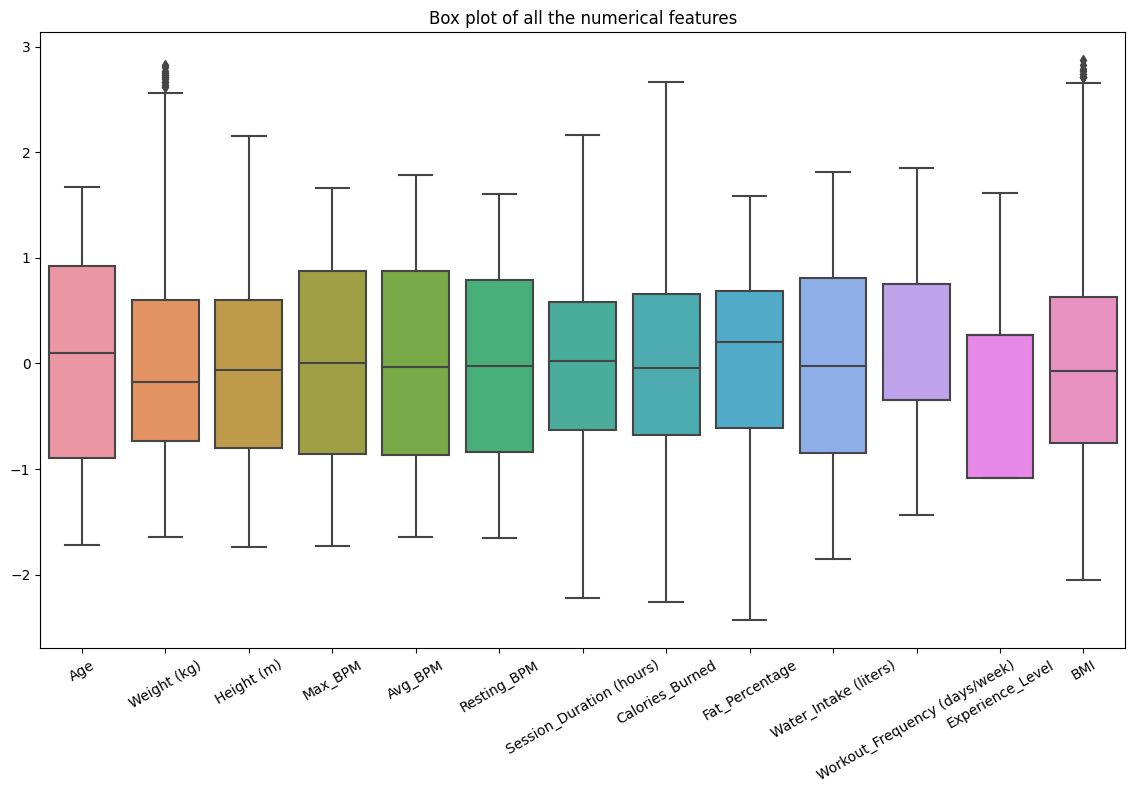

In [32]:
plt.figure(figsize=(14, 8))
plt.xticks(rotation=30)
sns.boxplot(numerical_df)
plt.title("Box plot of all the numerical features")
plt.show()

<Axes: >

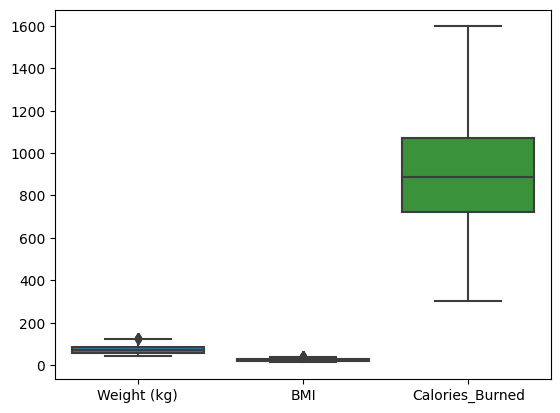

In [33]:
sns.boxplot(df3[['Weight (kg)', 'BMI', 'Calories_Burned']])

In [34]:
df3[['Weight (kg)', 'BMI', 'Calories_Burned']].std()

Weight (kg)         19.581836
BMI                  5.837905
Calories_Burned    262.988423
dtype: float64

In [35]:
df3[['Weight (kg)', 'BMI', 'Calories_Burned']].var()

Weight (kg)          383.448303
BMI                   34.081139
Calories_Burned    69162.910409
dtype: float64

In [36]:
df3[['Weight (kg)', 'BMI', 'Calories_Burned']].min()

Weight (kg)         40.00
BMI                 12.32
Calories_Burned    303.00
dtype: float64

In [37]:
df3[['Weight (kg)', 'BMI', 'Calories_Burned']].max()

Weight (kg)         127.50
BMI                  41.03
Calories_Burned    1598.00
dtype: float64

In [38]:
df3[['Weight (kg)', 'BMI', 'Calories_Burned']].corr()

,Weight (kg),BMI,Calories_Burned
Weight (kg),1.000000,0.827216,0.104360
BMI,0.827216,1.000000,0.062816
Calories_Burned,0.104360,0.062816,1.000000


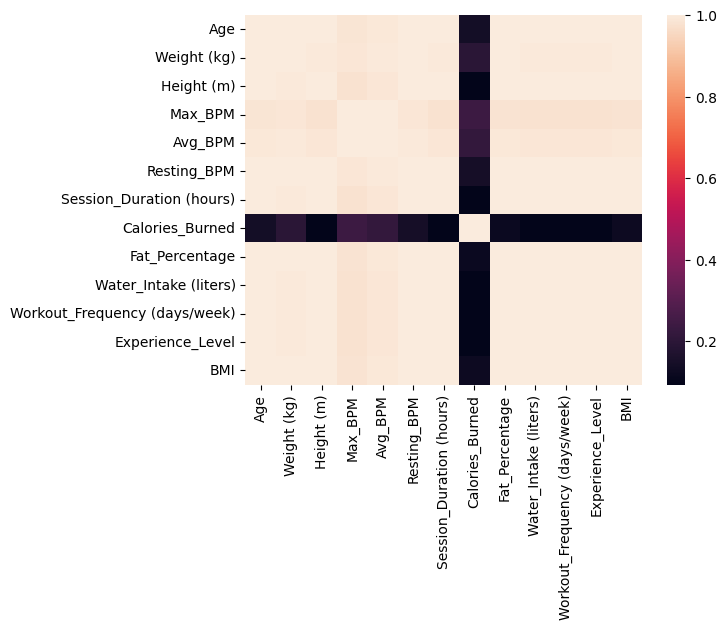

In [39]:
sns.heatmap(df3.describe().corr())
plt.show()

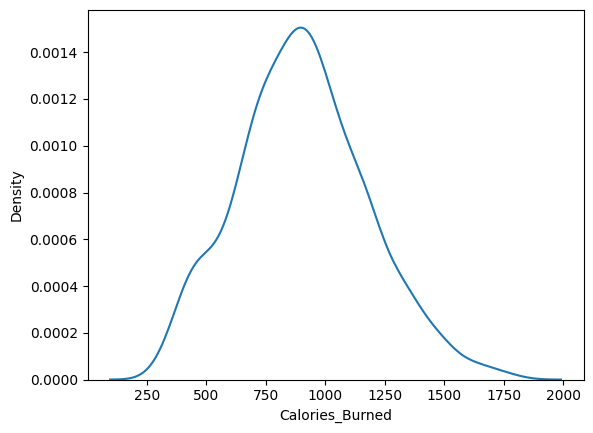

In [40]:
sns.kdeplot(df['Calories_Burned'])
plt.show()

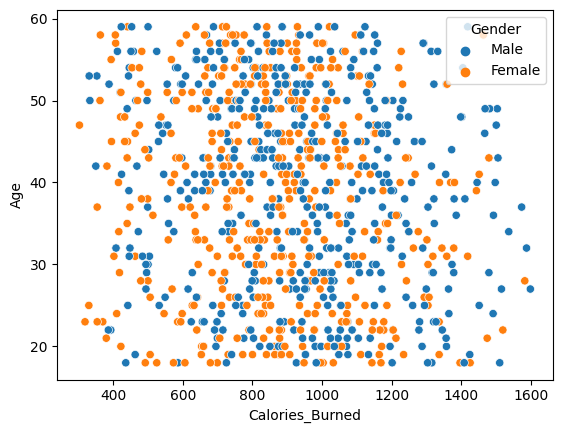

In [41]:
sns.scatterplot(data=df3, x='Calories_Burned', y='Age', hue='Gender')
plt.show()

## Building Machine Learning Model to detect BMI

In [42]:
df3.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


## Numerical and Categorical features

In [43]:
## splot the data for traingin and for testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df3.drop(columns='BMI'),
                                                   df3['BMI'],
                                                   test_size=0.25,
                                                   random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((699, 14), (233, 14), (699,), (233,))

In [44]:
categorical_features = [feature for feature in X_train.columns if X_train[feature].dtype == 'O']
numerical_features = [feature for feature in X_train.columns if feature not in categorical_features]

In [45]:
## ohe encoder
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
scaler = StandardScaler()
ohe = OneHotEncoder()

transformer = ColumnTransformer(transformers=[
    ('scaler', scaler, numerical_features),
    ("OneHot", ohe, categorical_features)
], remainder='passthrough')

In [46]:
X_train_transformed = transformer.fit_transform(X_train)
X_test_transformed = transformer.transform(X_test)

In [47]:
len(X_train_transformed[0])

18

In [48]:
X_train_transformed.shape, X_test_transformed.shape

((699, 18), (233, 18))

In [49]:
## regression algoriths
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [50]:
##Create a Function to Evaluate Model
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [51]:
## Beginning Model Training
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Adaboost Regressor":AdaBoostRegressor()
   
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train_transformed, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train_transformed)
    y_test_pred = model.predict(X_test_transformed)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 0.7299
- Mean Absolute Error: 0.5380
- R2 Score: 0.9844
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.7338
- Mean Absolute Error: 0.5533
- R2 Score: 0.9839


Lasso
Model performance for Training set
- Root Mean Squared Error: 2.0145
- Mean Absolute Error: 1.6342
- R2 Score: 0.8815
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 2.0540
- Mean Absolute Error: 1.6667
- R2 Score: 0.8740


Ridge
Model performance for Training set
- Root Mean Squared Error: 0.7300
- Mean Absolute Error: 0.5385
- R2 Score: 0.9844
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.7349
- Mean Absolute Error: 0.5542
- R2 Score: 0.9839


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 2.5780
- Mean Absolute Error: 2.0319
- R2 Score: 0.8058
-----------------------

In [52]:
RandomForestRegressor()

RandomForestRegressor()

In [53]:
rf_params = {"max_depth": [5, 8, 15, None, 10],
             "max_features": [5, 7, "auto", 8],
             "min_samples_split": [2, 8, 15, 20],
             "n_estimators": [100, 200, 500, 1000]}

In [54]:
# Models list for Hyperparameter tuning
randomcv_models = [("RF", RandomForestRegressor(), rf_params)]

In [55]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=100,
                                   cv=3,
                                   verbose=2,
                                   n_jobs=-1)
    random.fit(X_train_transformed, y_train)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

---------------- Best Params for RF -------------------
{'n_estimators': 1000, 'min_samples_split': 2, 'max_features': 'auto', 'max_depth': 15}


In [56]:
models = {
    "Random Forest Regressor": RandomForestRegressor(n_estimators=200, min_samples_split=2, max_features='auto', max_depth=10, 
                                                     n_jobs=-1)    
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train_transformed, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train_transformed)
    y_test_pred = model.predict(X_test_transformed)

    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)
    
    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    
    print('='*35)
    print('\n')

Random Forest Regressor
Model performance for Training set
- Root Mean Squared Error: 0.2439
- Mean Absolute Error: 0.1616
- R2 Score: 0.9983
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.6500
- Mean Absolute Error: 0.4056
- R2 Score: 0.9874




In [57]:
y_pred = model.predict(X_test_transformed)

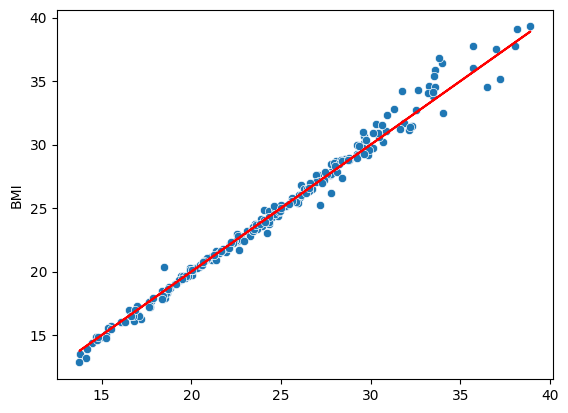

In [58]:
import seaborn as sns

sns.scatterplot(x=y_pred, y=y_test)
plt.plot(y_pred, model.predict(X_test_transformed), color='red')
plt.show()

## save the model

In [59]:
import pickle

pickle.dump(model, open("model.pkl", 'wb'))
pickle.dump(transformer, open('transformer.pkl', 'wb'))

## Test the model

In [60]:
ls

__notebook__.ipynb  model.pkl  transformer.pkl


In [61]:
new_model = pickle.load(open("model.pkl", 'rb'))
new_transformer = pickle.load(open("transformer.pkl", 'rb'))

In [62]:
df.sample(10)

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
502,30,Female,60.6,1.55,172,120,52,1.30,780.0,Strength,32.9,1.6,3,2,25.22
552,57,Female,61.9,1.52,168,143,51,0.92,592.0,HIIT,28.4,2.6,3,1,26.79
273,58,Female,65.2,1.63,167,121,53,1.12,610.0,HIIT,25.4,2.0,3,2,24.54
501,29,Female,68.7,1.72,171,168,62,1.08,907.0,Cardio,29.8,1.7,4,2,23.22
156,56,Female,40.4,1.80,196,165,72,1.23,913.0,Cardio,30.0,2.1,4,2,12.47
335,59,Male,88.1,1.76,187,168,74,1.35,1123.0,Strength,26.9,3.0,3,2,28.44
696,25,Male,123.8,1.99,180,121,72,1.13,752.0,HIIT,25.6,2.6,3,1,31.26
659,42,Male,64.8,1.65,161,166,67,1.10,904.0,Cardio,24.4,2.8,3,2,23.80
737,34,Male,115.3,1.81,181,167,67,1.36,1249.0,Yoga,24.5,2.2,2,1,35.19
869,55,Female,49.3,1.76,194,161,73,1.28,927.0,Strength,30.5,2.0,2,1,15.92


In [63]:
## input data
inp_df = df.drop(columns='BMI').iloc[[395]]
## transform the data
inp_data = new_transformer.transform(inp_df)
## prediction
new_model.predict(inp_data)

array([27.93512048])